# Credit Card Fraud detection Data

For my final project I choose the credit card fraud detection data set, from :"https://www.kaggle.com/dalpozz/creditcardfraud"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
df_creditcard = pd.read_csv('creditcard.csv', ",")
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000




The dataset contains transactions made by cardholders. This dataset presents 284.807 transactions that occurred in two days.

V(i) represent only numerical input , which are the principal components from the original dataset. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 


In [4]:
classes = pd.value_counts(df_creditcard['Class'], sort = True).sort_index()


In [5]:
classes


0    284315
1       492
Name: Class, dtype: int64

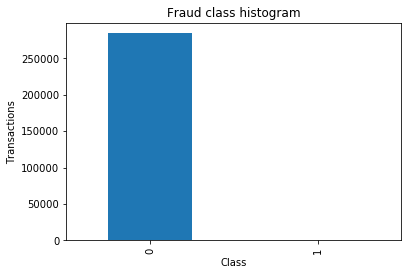

In [6]:
classes.plot(kind = 'bar')
plt.title('Fraud')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.show()

As we can see the dataset is highly unbalanced, only 492 cases of fraud over 284807 transactions.

The objectives of my project are: Build a model ables to classifie fraudolent transactions from non fraudolent transactions, with the lowest error. 

Find which are the main features "V(i)", that will help us to discover fraudolent transactions.

My intention is to create models using: Logistic Regression, SVMs, K-nearest neighbors. 
I'll apply cross validation for hyperparameter tuning on each different classification models.
The main task here is to find  the best model for unbalanced dataset, where there is an overwhelming class.

We will use the 'Recall' ration, 'ROC AUC', receiver operating characterisric area under the curve, and the accuracy ratio, for tuning our parameters, select the best model, evaluate the performance of each model.


In [3]:
from sklearn.preprocessing import StandardScaler
df_creditcard['normAmount'] = StandardScaler().fit_transform(df_creditcard['Amount'].values.reshape(-1, 1))
df_creditcard = df_creditcard.drop(['Time','Amount'],axis=1)
df_creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Divide the sample into dependente variable y ( Class) and independent variable X

In [4]:
y = (df_creditcard['Class'].values)
X = df_creditcard.drop(['Class'], axis=1)

From the histograms of each feature, we can see that:'V1,V14,V16,V17,V2,V20,V21,V23,V25,V27,V28, V5,V6,V7,V8, NormAmount' are the less helpfull characteristics for predicting fraud transactions. They have the same distributions as the Class distribution.

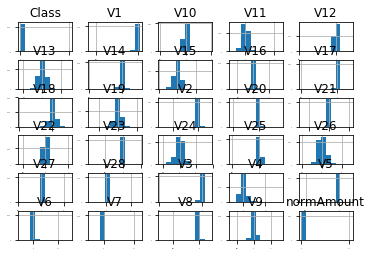

In [9]:
df_creditcard.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
pyplot.show()

Standardaize the values of the independent variable X

In [5]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

Divide the sample into train set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_train, y_test = \
train_test_split(X_std, y, test_size=0.3, random_state=0)

Estimate the logistic function on the test set, we use the GridsearchCV for define the best value for the inverse regularization parameter 'C', which maximize the recall ratio.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(random_state=0))])
param_range = np.logspace(-1, 3, 15)
param_grid = [{'clf__C': param_range}]
gs = GridSearchCV(estimator= pipe_lr,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_std_train, y_train)
gs_b=gs.best_params_

In [20]:
print(gs.best_score_)
print(gs.best_params_)

0.620503845085
{'clf__C': 2.6826957952797246}


In [15]:
lr = LogisticRegression(C=2.68, random_state=0)
lr.fit(X_std_train, y_train)
lr_train_pred=lr.predict(X_std_train)
lr_test_pred= lr.predict(X_std_test)

Calculate the residual sum of square of the training set and for the test set

In [16]:
rss_train=sum((lr_train_pred-y_train)*(lr_train_pred-y_train))
rss_test=sum((lr_test_pred-y_test)*(lr_test_pred-y_test))
print(rss_train,rss_test)

159 68


In [17]:
from sklearn.metrics import mean_squared_error,accuracy_score
print('LogisticRegression\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,lr_train_pred),
accuracy_score(y_test,lr_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,lr_train_pred),mean_squared_error(y_test,lr_test_pred)))

LogisticRegression
Train Accuracy: 0.999 Test Accuracy:0.999
Train MSE: 0.001 Test MSE: 0.001


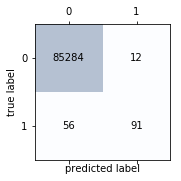

In [18]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=lr_test_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [19]:
result=np.matrix(confmat)
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.38095238095238093

As we expected, for unbalance dataset, the accuracy ratio is very high.

We can see, 56 over 147 fraudolent transactions are misclassified.

We want to reduce the misclassification error of the fraudolent transactions, let's try using Pipeline

In [20]:
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_std_train, y_train)
print('logistic Rgression Test Accuracy: %.3f' % pipe_lr.score(X_std_test, y_test))
y_pred = pipe_lr.predict(X_std_test)

logistic Rgression Test Accuracy: 0.999


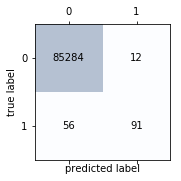

In [22]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [23]:
result=np.matrix(confmat)


ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud


0.38095238095238093

Pipeline doesn't perform better than Scikit learn logistic regression

Let's try to estimate a Logistic regression on the undersample of the data. An undersample, is a smaller sample from the original dataset, with the same number of fraudolent transactions, of the original one, and a proportional number of non-fraudolent transactions. In this way we stress the featers that help us to recognize the fraudolent transactions.

The undersample of the data is made in a way that the non fraudolent transactions are 10 times the fraudolent transactions,  classes 10:1. 

In [7]:
def undersample(df_creditcard, ratio=10):
    fraud = df_creditcard[df_creditcard.Class == 1]
    oth = df_creditcard[df_creditcard.Class == 0].sample(n=ratio*len(fraud))
    return pd.concat([fraud, oth]).sample(frac=1) #shuffle the data
df_creditcard_under = undersample (df_creditcard) #the undersample

In [25]:
count_classes = pd.value_counts(df_creditcard_under['Class'], sort = True).sort_index()
print(count_classes)

0    4920
1     492
Name: Class, dtype: int64


The cell above shows the proportion between fraudolent transactions (class=1) and non fraudolent transactions (class=0).

In [8]:
y_u = df_creditcard_under.Class
X_u= df_creditcard_under.drop('Class', axis=1)

In [9]:
stdsc=StandardScaler()
X_u_std=stdsc.fit_transform(X_u)
pd.DataFrame(X_u_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,5412.0,-2.057564e-17,1.000092,-11.454926,-0.230016,0.083570,0.554366,0.908046
1,5412.0,1.685233e-17,1.000092,-16.031229,-0.381916,-0.080857,0.289672,9.433286
2,5412.0,4.623365e-18,1.000092,-9.361948,-0.175092,0.206510,0.483210,1.366362
3,5412.0,2.004227e-17,1.000092,-2.436719,-0.578076,-0.129152,0.308733,5.665971
4,5412.0,-2.584264e-17,1.000092,-9.651313,-0.243059,0.067265,0.381071,10.895329
5,5412.0,-1.716774e-17,1.000092,-11.228374,-0.498918,-0.135738,0.335534,8.000875
6,5412.0,2.083207e-17,1.000092,-14.820516,-0.073296,0.160535,0.351414,5.826729
7,5412.0,1.080324e-17,1.000092,-17.698681,-0.107305,-0.000048,0.147275,8.600364
8,5412.0,-1.423678e-17,1.000092,-8.868139,-0.387262,0.071612,0.541405,4.989068
9,5412.0,3.251485e-18,1.000092,-9.896876,-0.079874,0.146282,0.362755,4.611896


In [10]:
from sklearn.model_selection import train_test_split
X_u_std_train, X_u_std_test, y_u_train, y_u_test = \
train_test_split(X_u_std, y_u, test_size=0.3, random_state=0)

Using GridSearchCV we want to estimate the best value for the parameter C, our objective is to maximize the Recall score.

In [29]:
from sklearn.model_selection import GridSearchCV
pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(random_state=1))])
param_range = np.logspace(-1, 3, 15)
param_grid = [{'clf__C': param_range}]
gs = GridSearchCV(estimator= pipe_lr,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_u_std_train, y_u_train)
gs_b=gs.best_params_
    

In [30]:
print(gs.best_score_)
print(gs.best_params_)


0.853934583337
{'clf__C': 2.6826957952797246}


In [31]:
clf = gs.best_estimator_
clf.fit(X_u_std_train, y_u_train)
print('Test recall: %.3f' % clf.score(X_u_std_test, y_u_test))

Test recall: 0.988


In [44]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-1, 3, 15)

pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(random_state=1))])
param_range = np.logspace(-1, 3, 15)
param_grid = [{'clf__C': param_range}]
train_scores, test_scores = validation_curve(
              estimator=pipe_lr,
              X=X_u_std_train,
              y=y_u_train,
              param_name='clf__C',
              param_range= param_range,
              cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


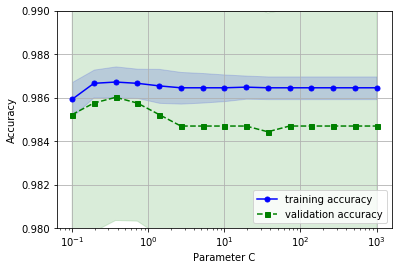

In [46]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.98, 0.99])
plt.show()


Using validation curve, we evaluate the performance of the Logistic regression for different, inverse regularization parameters 'C'.

Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data for small value of C. However, for large values of C, the model tends to slightly overfit the data. 

We put the 'C' value that we found using GrindsearchCV

In [32]:
from sklearn.linear_model import LogisticRegression
lr_u = LogisticRegression(C=2.68, random_state=0)

lr_u.fit(X_u_std_train, y_u_train)
lr_u_train_pred=lr_u.predict(X_u_std_train)
lr_u_test_pred= lr_u.predict(X_u_std_test)

In [33]:
rss_u_train=sum((lr_u_train_pred-y_u_train)*(lr_u_train_pred-y_u_train))
rss_u_test=sum((lr_u_test_pred-y_u_test)*(lr_u_test_pred-y_u_test))
print(rss_u_train,rss_u_test)

53 19


In [34]:
from sklearn.metrics import mean_squared_error,accuracy_score
print('LogisticRegressionU\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_u_train,lr_u_train_pred),
accuracy_score(y_u_test,lr_u_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_u_train,lr_u_train_pred),mean_squared_error(y_u_test,lr_u_test_pred)))

LogisticRegressionU
Train Accuracy: 0.986 Test Accuracy:0.988
Train MSE: 0.014 Test MSE: 0.012


The overall performance, in absolute value, of the model, estimated using the undersample, is worst than the performance in the whole sample. This is reasonable, because we introduced more bias in our framework for detecting the fraudolent transactions. So we made the task harder for the logistic function.

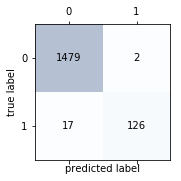

In [35]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_u_test, y_pred=lr_u_test_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [36]:
result=np.matrix(confmat)

ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud


0.11888111888111888

The misclassied number of fraudolent transactions in the undersample test set

We estimate the total error and the number of misclassified fraudolent transactions in the original dataset using the Logistic regression function estimated in the undersample data set.

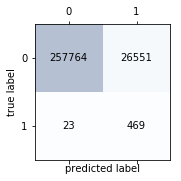

0.093305290951416223

In [37]:
y_c_pred = lr_u.predict(X_std)

confmat = confusion_matrix(y_true=y, y_pred=y_c_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

result=np.matrix(confmat)

ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR



The accuracy, of our model estimated in the undersample, and performed in the whole sample, is worst than the accuracy of the model estimated in the whole sample

In [38]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.046747967479674794

As we can see above, using the undersample framework, we reach a better resault, if compared with the result obtained with the simple logistic regression applied to the original data set.

we misclassified 23 fraudolent transactions over 492. Wich is an improvement, if compared with the privious model, in any case, we paid this improvement with a lower accuracy rate

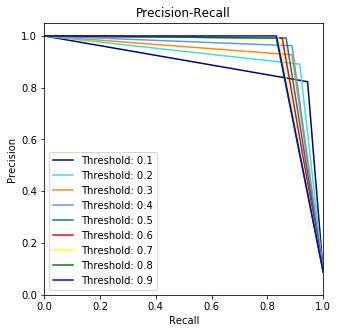

In [39]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 


lr = LogisticRegression(C = 0.72, penalty = 'l1')
lr.fit(X_u_std_train,y_u_train.values.ravel())
y_u_proba = lr.predict_proba(X_u_std_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_u_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_u_test,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")
plt.show()

The plot above shows the trade-off between the precision ratio and the recall ratio.

PRE=TP/TP+FP

REC=TP/FN+TP

The best model will be the one that best handle the trade off between Precision ratio and Recall ratio

# SVM

Let's see if SVM using 'Linear' kernel or 'radial basis function' perform better results. We will use the undersample framework, so estimate the SVM in the undersample and see which results it obtains in the original standardized data set.

We estimate our 'C' parameter using Grindsearch, with the objective of maximizing the recall ratio 

In [31]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('clf', SVC(random_state=1))])
param_range = np.logspace(-1, 3, 5)
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']}]
gs = GridSearchCV(estimator= pipe_svc,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_u_std_train, y_u_train)

print(gs.best_score_)
print(gs.best_params_)

0.831533861505
{'clf__C': 1.0, 'clf__kernel': 'linear'}


In [32]:
clf = gs.best_estimator_
clf.fit(X_u_std_train, y_u_train)
print('Test recall: %.3f' % clf.score(X_u_std_test, y_u_test))


Test recall: 0.984


In [33]:
SVM_model1=SVC(kernel='linear',random_state=1,C=1)

SVM_model1.fit(X_u_std_train,y_u_train)
SVM_model1_train_pred,SVM_model1_test_pred=SVM_model1.predict(X_u_std_train),SVM_model1.predict(X_u_std_test)

from sklearn.metrics import mean_squared_error,accuracy_score
print('SVM_model\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_u_train,SVM_model1_train_pred),
accuracy_score(y_u_test,SVM_model1_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_u_train,SVM_model1_train_pred),mean_squared_error(y_u_test,SVM_model1_test_pred)))

SVM_model
Train Accuracy: 0.985 Test Accuracy:0.984
Train MSE: 0.015 Test MSE: 0.016


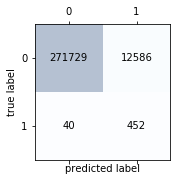

In [34]:
y_c_pred = SVM_model1.predict(X_std)
confmats = confusion_matrix(y_true=y, y_pred=y_c_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmats, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmats.shape[0]):
    for j in range(confmats.shape[1]):
        ax.text(x=j, y=i,
                s=confmats[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()



In [35]:
result=np.matrix(confmats)
ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR

0.044331775553269406

The accuracy in the case of SVC with linear kernel is good.

In [36]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.081300813008130079

The misclassification error of fraudolent transactions is low, using the undersample framework.

In [46]:
pipe_svc_r = Pipeline([('clf', SVC(random_state=1))])
param_range = np.logspace(-1, 3, 15)
param_grid = [{'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator= pipe_svc_r,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_u_std_train, y_u_train)

print(gs.best_score_)
print(gs.best_params_)


0.770896595175
{'clf__C': 2.6826957952797246, 'clf__gamma': 0.10000000000000001, 'clf__kernel': 'rbf'}


In [47]:
clf = gs.best_estimator_
clf.fit(X_u_std_train, y_u_train)
print('Test recall: %.3f' % clf.score(X_u_std_test, y_u_test))


Test recall: 0.980


In [48]:
SVM_model2=SVC(kernel='rbf',random_state=0,C=2.68, gamma=0.1)
SVM_model2.fit(X_u_std_train,y_u_train)
SVM_model2_train_pred,SVM_model2_test_pred=SVM_model2.predict(X_u_std_train),SVM_model2.predict(X_u_std_test)

from sklearn.metrics import mean_squared_error,accuracy_score
print('SVM_model\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_u_train,SVM_model2_train_pred),
accuracy_score(y_u_test,SVM_model2_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_u_train,SVM_model2_train_pred),mean_squared_error(y_u_test,SVM_model2_test_pred)))

SVM_model
Train Accuracy: 0.994 Test Accuracy:0.980
Train MSE: 0.006 Test MSE: 0.020


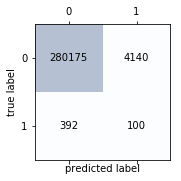

In [49]:
y_c_pred = SVM_model2.predict(X_std)
confmats = confusion_matrix(y_true=y, y_pred=y_c_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmats, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmats.shape[0]):
    for j in range(confmats.shape[1]):
        ax.text(x=j, y=i,
                s=confmats[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()



In [50]:
result=np.matrix(confmats)
ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR


0.015912530239776412

In [51]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.7967479674796748

Using the SVC with radial basis function we have a good accuracy, the highest accuracy using the undersample framework, but the highest misclassification error, so far.

KNN

Let's estimate the K-nearest neighbors in the undersample and predicts the fraudolent transactions in the original standardized data set.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model_knn = KNeighborsClassifier()
model_knn.fit(X_u_std_train, y_u_train)
predictions = model_knn.predict(X_std)

In [53]:

print("accuracy score:")
print(accuracy_score(y, predictions))

print("classification report: ")
print(classification_report(y, predictions))

accuracy score:
0.9933744606
classification report: 
             precision    recall  f1-score   support

          0       1.00      0.99      1.00    284315
          1       0.19      0.88      0.31       492

avg / total       1.00      0.99      1.00    284807



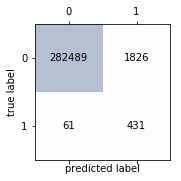

In [54]:
confmatk = confusion_matrix(y_true=y, y_pred=predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmatk, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmatk.shape[0]):
    for j in range(confmatk.shape[1]):
        ax.text(x=j, y=i,
                s=confmatk[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [55]:
result=np.matrix(confmatk)
ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR

0.0066255394003658617

In [56]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.12398373983739837

The accuracy is good, but the misclassification of the fraudolent transactions is still high.

# Cross Validation


Using Cross Validation, I want to see which is the best model, among: SVC with linear kernel, SVC with radial basis function, Logistic regression and K-nearest neighbors, according to 'Recall ratio' and 'Receiving operator characteristic area under the curve'.

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc

In [58]:
num_folds = 20
scoring = 'recall'

#scoring = 'recall'
#evaluate each algorithm for 
SVCl= SVC(kernel='linear',random_state=0, C=10, probability=True)
SVCr = SVC(kernel='rbf',random_state=0, C=10, gamma=0.1, probability= True)
LR = LogisticRegression(penalty='l1', C=1.39, random_state=0)
KNN = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

clf_labels = ['SVCl', 'SVCr', 'LR', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip ([SVCl, SVCr, LR, KNN], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_u_std_train,
                             y=y_u_train,
                             cv=10,
                             scoring='recall')
   
    print("[%s]: %f (+/- %f) Recall "
          % (label ,scores.mean(), scores.std()))

10-fold cross validation:

[SVCl]: 0.822353 (+/- 0.056826) Recall 
[SVCr]: 0.770924 (+/- 0.095328) Recall 
[LR]: 0.853950 (+/- 0.070366) Recall 
[KNN]: 0.842521 (+/- 0.068904) Recall 


In [59]:


num_folds = 20
scoring = 'roc_auc'

#scoring = 'auc'
#evaluate each algorithm for 
SVCl= SVC(kernel='linear',random_state=0, C=10, probability=True)
SVCr = SVC(kernel='rbf',random_state=0, C=10, gamma=0.1, probability= True)
LR = LogisticRegression(penalty='l1', C=1.39, random_state=0)
KNN = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

clf_labels = ['SVCl', 'SVCr', 'LR', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip ([SVCl, SVCr, LR, KNN], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_u_std_train,
                             y=y_u_train,
                             cv=10,
                             scoring='roc_auc')
   
    print("[%s]: %f (+/- %f) ROC AUC "
          % (label ,scores.mean(), scores.std()))
 




10-fold cross validation:

[SVCl]: 0.969655 (+/- 0.021966) ROC AUC 
[SVCr]: 0.961790 (+/- 0.024182) ROC AUC 
[LR]: 0.974855 (+/- 0.020583) ROC AUC 
[KNN]: 0.917916 (+/- 0.033849) ROC AUC 


The CV confirms our first result, the Logistic regression is the best model for predicting the fraudolent transactions, according to the results obtained using the 'Recal' ratio and the 'ROC AUC'.

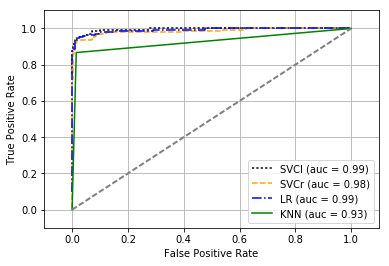

In [60]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.','-']
all_clf= [SVCl, SVCr, LR, KNN]
for clf, label, clr, ls \
       in zip(all_clf, clf_labels, colors, linestyles):
     y_pred = clf.fit(X_u_std_train,
                        y_u_train).predict_proba(X_u_std_test)[:, 1]

     fpr, tpr, thresholds = roc_curve(y_true = y_u_test,
                                      y_score= y_pred)
     roc_auc = auc(x=fpr, y=tpr)
     plt.plot(fpr, tpr,
              color=clr,
              linestyle=ls,
              label= '%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Receiver operator characteristic graphs is usefull for selecting models for classification based on their performance with respect to the false positive and true positive rates.

The diagonal is a random guessing, so if the model fall below the diagonal it is considered as worse than random guessing.

As we can see the best models are SVCl and Logistic regression function, they fall into the top left corner of the graph with a true positive rate close to one and a false positive rate close to zero.

Let's see which are the most important attribute which help us to predict the Class fraudolent transactions. We will use Random Forest classifier for our analysis.

In [11]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# display the relative importance of each attribute

# Feature Importance

#Feature Importance via Random Forest


feat_labels = X.columns[:]
forest = RandomForestClassifier (n_estimators=10000,
                                 random_state=0,
                                 n_jobs=-1)
forest.fit(X_std_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances) [::-1]
for f in range(X_std_train.shape[1]):
    print ("%2d %-*s %f" % (f + 1, 30,
                            feat_labels[f],
                            importances[indices[f]]))



 1 V1                             0.175648
 2 V2                             0.133855
 3 V3                             0.118145
 4 V4                             0.073613
 5 V5                             0.072284
 6 V6                             0.062486
 7 V7                             0.035458
 8 V8                             0.031074
 9 V9                             0.026505
10 V10                            0.025575
11 V11                            0.020711
12 V12                            0.019851
13 V13                            0.017790
14 V14                            0.014969
15 V15                            0.014862
16 V16                            0.013529
17 V17                            0.013406
18 V18                            0.013241
19 V19                            0.012679
20 V20                            0.012404
21 V21                            0.012154
22 V22                            0.011565
23 V23                            0.011496
24 V24     

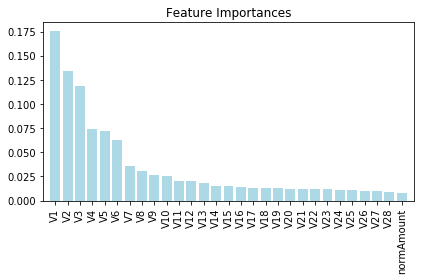

In [12]:
plt.title('Feature Importances')
plt.bar(range(X_std_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_std_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, X_std_train.shape[1]])
plt.tight_layout()
plt.show()

As we could expect the ordering is determined by the PC, and the last helpfull is the attribute normAmount.

I build a sample made by all the fraudolent transactions and an equal amount of non-fraudolent transactions, randomly chosen.
Using Random forest classifier, we can measure feature importance, as the averaged impurity decrease, computed from all decision trees in the forest.

I want to see, if in this new sample the order of importance is modified

In [13]:
def undersample(df_creditcard, ratio=1 ):
    fraud = df_creditcard[df_creditcard.Class == 1]
    oth = df_creditcard[df_creditcard.Class == 0].sample(n=ratio*len(fraud))
    return pd.concat([fraud, oth]).sample(frac=1) #shuffle data

df_creditcard_Under = undersample (df_creditcard)

count_classes = pd.value_counts(df_creditcard_Under['Class'], sort = True).sort_index()
print(count_classes)


0    492
1    492
Name: Class, dtype: int64


In [14]:
y_U = df_creditcard_Under.Class
X_U= df_creditcard_Under.drop('Class', axis=1)

stdsc=StandardScaler()
X_U_std=stdsc.fit_transform(X_U)

 1 V1                             0.172207
 2 V2                             0.130102
 3 V3                             0.111543
 4 V4                             0.102231
 5 V5                             0.082614
 6 V6                             0.074011
 7 V7                             0.042426
 8 V8                             0.037478
 9 V9                             0.035125
10 V10                            0.022735
11 V11                            0.017036
12 V12                            0.014506
13 V13                            0.014129
14 V14                            0.013087
15 V15                            0.012570
16 V16                            0.010628
17 V17                            0.010554
18 V18                            0.010269
19 V19                            0.010196
20 V20                            0.009316
21 V21                            0.009149
22 V22                            0.008747
23 V23                            0.008263
24 V24     

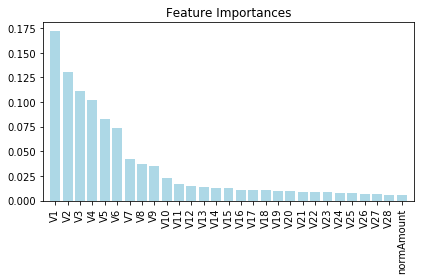

In [16]:
forest.fit(X_U_std, y_U)
importances = forest.feature_importances_
indices = np.argsort(importances) [::-1]
for f in range(X_U_std.shape[1]):
    print ("%2d %-*s %f" % (f + 1, 30,
                            feat_labels[f],
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_U_std.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_U_std.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, X_U_std.shape[1]])
plt.tight_layout()
plt.show()

Even in the new sample with equal amount of fraudolent transactions and non-fraudolent transactions, the order of importance of the attributes is the same established by the PC with normAmount as the last attribute.

I want to see, if dropping the less helpfull attributes (V19-normAmount), we reach better results. I will use the Logistic regression model, as the most suitable model for our porposes, and I will estimate it in the undersample framework.

In [21]:
df_creditcard = df_creditcard.drop(['V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','normAmount'],axis=1)
y = df_creditcard.Class
X= df_creditcard.drop('Class', axis=1)
X_std =stdsc.fit_transform(X)

In [22]:
def undersample(df_creditcard, ratio=10):
    fraud = df_creditcard[df_creditcard.Class == 1]
    oth = df_creditcard[df_creditcard.Class == 0].sample(n=ratio*len(fraud))
    return pd.concat([fraud, oth]).sample(frac=1) #shuffle data

df_creditcard_under = undersample (df_creditcard)

In [23]:
y_u = df_creditcard_under.Class
X_u= df_creditcard_under.drop('Class', axis=1)
stdsc=StandardScaler()
X_u_std=stdsc.fit_transform(X_u)

In [24]:
from sklearn.model_selection import train_test_split
X_u_std_train, X_u_std_test, y_u_train, y_u_test = \
train_test_split(X_u_std, y_u, test_size=0.3, random_state=0)

In [25]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(random_state=1))])
param_range = np.logspace(-1, 3, 15)
param_grid = [{'clf__C': param_range}]
gs = GridSearchCV(estimator= pipe_lr,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=10,
                  n_jobs=-1)
gs
gs = gs.fit(X_u_std_train, y_u_train)

print(gs.best_score_)
print(gs.best_params_)


0.858180773509
{'clf__C': 1.3894954943731375}


In [37]:
from sklearn.linear_model import LogisticRegression
lr_u = LogisticRegression(C=1.38, random_state=1, penalty = 'l1')

lr_u.fit(X_u_std_train, y_u_train)
lr_u_train_pred=lr_u.predict(X_u_std_train)
lr_u_test_pred= lr_u.predict(X_u_std_test)

rss_u_train=sum((lr_u_train_pred-y_u_train)*(lr_u_train_pred-y_u_train))
rss_u_test=sum((lr_u_test_pred-y_u_test)*(lr_u_test_pred-y_u_test))
print(rss_u_train,rss_u_test)

from sklearn.metrics import mean_squared_error,accuracy_score
print('LogisticRegressionU\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_u_train,lr_u_train_pred),
accuracy_score(y_u_test,lr_u_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_u_train,lr_u_train_pred),mean_squared_error(y_u_test,lr_u_test_pred)))


51 24
LogisticRegressionU
Train Accuracy: 0.987 Test Accuracy:0.985
Train MSE: 0.013 Test MSE: 0.015


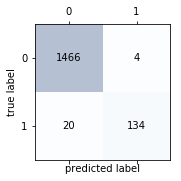

0.12987012987012986

In [38]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_u_test, y_pred=lr_u_test_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


result=np.matrix(confmat)
ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR

ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud


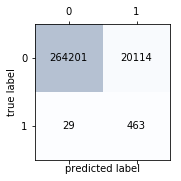

In [39]:
y_c = lr_u.predict(X_std)
confmat1 = confusion_matrix(y_true=y, y_pred=y_c)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax.text(x=j, y=i,
                s=confmat1[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()




In [40]:
result=np.matrix(confmat1)
ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR

0.070725087515405169

In [41]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.05894308943089431

Dropping the less helpfull attributes, we improved our accuracy (from 0.09 to 0.07), but we increase the misclassification error (from 0.0467 to 0.0589).



In conclusion, for our task, the Logistic regression function is the best model, using Random forecast for selecting the meaningfull characteristic, we can reach a good performance which takes care of accuracy and misclassification of the fraudolent transactions.